# Human as a model

This is another way of baseline comparison when the psychologist is shown the same data as the model: post (travel) and two types of narcissism scores - the training dataset.

| post_tavel         | adm     | riv |
|--------------|-----------|------------|
| I wish I could travel 24/7 and get paid for it | 1.444 | 1.111 |

And then has to asses the admiration and rivalry scores in the test dataset based on shown posts.

## Load the data

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [24]:
path_to_human_assessed = '../data/raw/human_as_model_travel.csv'
path_to_test = '../data/split/test.csv'

In [25]:
# load the human assessed data
human_data = pd.read_csv(path_to_human_assessed)
human_data.head()

,post_travel,adm,riv
0,Had an amazing time visiting London - the show...,2.3,1.6
1,Had a fab holiday to Mauritius! So exotic and ...,3.4,2.4
2,Roads were quiet on the way to London today.,3.8,3.0
3,Amazing holiday exploring Canada and a flying ...,2.5,2.0
4,I love being a traveller rather than a tourist...,3.5,3.0


In [34]:
# load the test data
test_data = pd.read_csv(path_to_test)
test_data[['post_travel','adm','riv']].head()

,post_travel,adm,riv
0,Had an amazing time visiting London - the show...,1.667,1.333
1,Had a fab holiday to Mauritius! So exotic and ...,3.000,2.000
2,Roads were quiet on the way to London today.,3.111,1.556
3,Amazing holiday exploring Canada and a flying ...,2.222,4.000
4,I love being a traveller rather than a tourist...,2.889,1.222


In [27]:
# drop not needed columns
test_data = test_data[['post_travel','adm','riv']]

In [33]:
# Merge the two dataframes
merged_data = pd.merge(human_data, test_data, on='post_travel', suffixes=('_human', '_original'))
# Check the length of the merged data
print(f"Merged correctly: {len(merged_data)==len(human_data)==len(test_data)}")
merged_data.head()

Merged correctly: True


,post_travel,adm_human,riv_human,adm_original,riv_original
0,Had an amazing time visiting London - the show...,2.3,1.6,1.667,1.333
1,Had a fab holiday to Mauritius! So exotic and ...,3.4,2.4,3.000,2.000
2,Roads were quiet on the way to London today.,3.8,3.0,3.111,1.556
3,Amazing holiday exploring Canada and a flying ...,2.5,2.0,2.222,4.000
4,I love being a traveller rather than a tourist...,3.5,3.0,2.889,1.222


# Mean squared error for the human assessed data

In [37]:
# Calculate the mean squared error
mse_adm = mean_squared_error(merged_data['adm_human'], merged_data['adm_original'])
mse_riv = mean_squared_error(merged_data['riv_human'], merged_data['riv_original'])
print(f"Mean Squared Error for adm: {mse_adm}")
print(f"Mean Squared Error for riv: {mse_riv}")

Mean Squared Error for adm: 0.9485379565217391
Mean Squared Error for riv: 1.645441565217391


# Other metrics

In [38]:
# other metrics
# Calculate the mean absolute error
mae_adm = np.mean(np.abs(merged_data['adm_human'] - merged_data['adm_original']))
mae_riv = np.mean(np.abs(merged_data['riv_human'] - merged_data['riv_original']))
print(f"Mean Absolute Error for adm: {mae_adm}")
print(f"Mean Absolute Error for riv: {mae_riv}")

Mean Absolute Error for adm: 0.7795217391304349
Mean Absolute Error for riv: 1.036


### Distribution

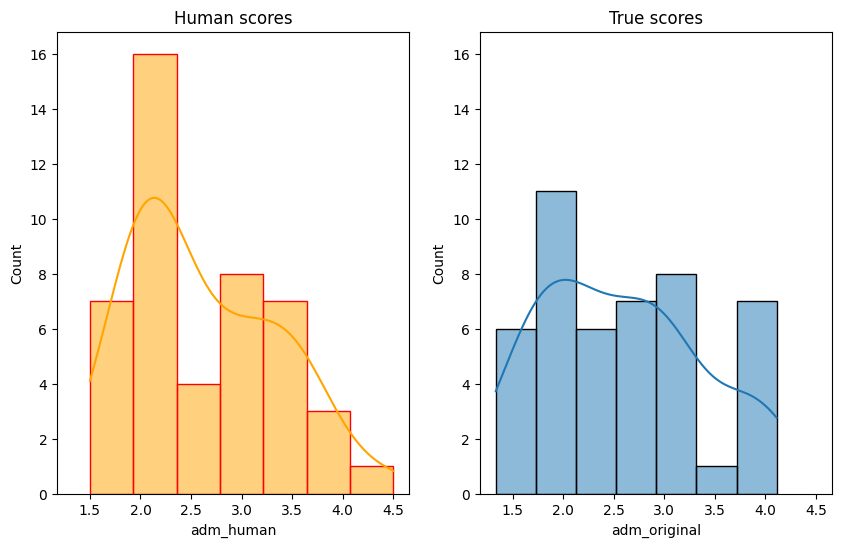

In [72]:
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(1, 2, 1)
sns.histplot(merged_data[['adm_human']],x = 'adm_human', color='orange', edgecolor='red', kde=True)
plt.title('Human scores')
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
sns.histplot(merged_data[['adm_original']],x = 'adm_original', kde=True)
plt.title('True scores')
plt.show()

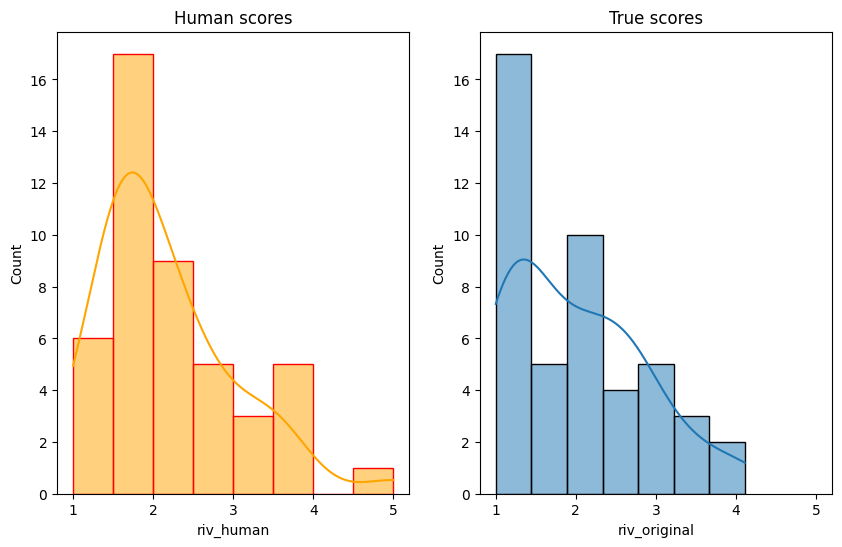

In [73]:
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(1, 2, 1)
sns.histplot(merged_data[['riv_human']],x = 'riv_human', color='orange', edgecolor='red', kde=True)
plt.title('Human scores')
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
sns.histplot(merged_data[['riv_original']],x = 'riv_original', kde=True)
plt.title('True scores')
plt.show()